In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
cancer_data = pd.read_csv('/content/Cancer_Data.csv')
cervical_cancer_data = pd.read_csv('/content/kag_risk_factors_cervical_cancer.csv')

In [ ]:
X_cancer = cancer_data.drop(columns=['diagnosis'])
# Convert 'diagnosis' to numerical using LabelEncoder
le = LabelEncoder()
y_cancer = le.fit_transform(cancer_data['diagnosis']) # Convert to 0 and 1

# Convert '?' to NaN and drop or impute for Cervical Cancer Data
cervical_cancer_data.replace('?', np.nan, inplace=True)
cervical_cancer_data = cervical_cancer_data.dropna()  # Simple drop, consider imputation
X_cervical = cervical_cancer_data.drop(columns=['Biopsy'])
y_cervical = cervical_cancer_data['Biopsy'] # Already numerical 0 and 1

# Standardize data
scaler = StandardScaler()
X_cancer = scaler.fit_transform(X_cancer)
X_cervical = scaler.fit_transform(X_cervical)

# Split data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
X_train_cervical, X_test_cervical, y_train_cervical, y_test_cervical = train_test_split(X_cervical, y_cervical, test_size=0.2, random_state=42)

# Reshape data for CNN input (e.g., 5x6 for 30 features)
X_train_cancer = np.reshape(X_train_cancer, (X_train_cancer.shape[0], 8, 4, 1))
X_test_cancer = np.reshape(X_test_cancer, (X_test_cancer.shape[0], 8, 4, 1))

X_train_cervical = np.reshape(X_train_cervical, (X_train_cervical.shape[0], 7, 5, 1))  # Adjust for 35 features
X_test_cervical = np.reshape(X_test_cervical, (X_test_cervical.shape[0], 7, 5, 1))

# Define CNN model with padding='same' to adjust for smaller dimensions
def build_cnn_model(input_shape=(8, 8, 1)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'), # Added padding='same'
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),  # Added padding='same'
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train on Cancer dataset
model_cancer = build_cnn_model(input_shape=(8, 4, 1)) # Pass correct input shape
model_cancer.fit(X_train_cancer, y_train_cancer, epochs=150, batch_size=32, validation_split=0.2)
cancer_loss, cancer_accuracy = model_cancer.evaluate(X_test_cancer, y_test_cancer)

# Train on Cervical Cancer dataset
model_cervical = build_cnn_model(input_shape=(7, 5, 1)) # Pass correct input shape
model_cervical.fit(X_train_cervical, y_train_cervical, epochs=10, batch_size=32, validation_split=0.2)
cervical_loss, cervical_accuracy = model_cervical.evaluate(X_test_cervical, y_test_cervical)

print(f'Cancer Data - Test accuracy: {cancer_accuracy:.4f}, Test loss: {cancer_loss:.4f}')
print(f'Cervical Cancer Data - Test accuracy: {cervical_accuracy:.4f}, Test loss:')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6021 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6330 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6448 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6155 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6174 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6252 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6166 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6307 - loss: nan - val_accuracy: 0.6374 - val_loss: nan
Epoch 9/150
12/12 ━━━━━━

In [ ]:
# Cancer dataset: Drop unnecessary columns and encode target variable
cancer_data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})  # Encode 'M' as 1, 'B' as 0
X_cancer = cancer_data.drop(columns=['diagnosis'])
y_cancer = cancer_data['diagnosis']

# Cervical Cancer dataset: Replace '?' with NaN and drop rows with missing values
cervical_cancer_data.replace('?', np.nan, inplace=True)
cervical_cancer_data = cervical_cancer_data.dropna()
X_cervical = cervical_cancer_data.drop(columns=['Biopsy'])
y_cervical = cervical_cancer_data['Biopsy']

# Standardize features
scaler = StandardScaler()
X_cancer = scaler.fit_transform(X_cancer)
X_cervical = scaler.fit_transform(X_cervical)

# Split data into train and test sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
X_train_cervical, X_test_cervical, y_train_cervical, y_test_cervical = train_test_split(X_cervical, y_cervical, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_cancer = KNeighborsClassifier(n_neighbors=5)
knn_cervical = KNeighborsClassifier(n_neighbors=5)

# Train KNN on Cancer dataset
knn_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_knn = knn_cancer.predict(X_test_cancer)
print("Cancer Dataset - KNN")
print(f"Accuracy: {accuracy_score(y_test_cancer, y_pred_cancer_knn):.4f}")
print(classification_report(y_test_cancer, y_pred_cancer_knn))

# Train KNN on Cervical Cancer dataset
knn_cervical.fit(X_train_cervical, y_train_cervical)
y_pred_cervical_knn = knn_cervical.predict(X_test_cervical)
print("\nCervical Cancer Dataset - KNN")
print(f"Accuracy: {accuracy_score(y_test_cervical, y_pred_cervical_knn):.4f}")
print(classification_report(y_test_cervical, y_pred_cervical_knn))

# Initialize Naive Bayes classifier
nb_cancer = GaussianNB()
nb_cervical = GaussianNB()

# Train Naive Bayes on Cancer dataset
nb_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_cancer_nb = nb_cancer.predict(X_test_cancer)
print("\nCancer Dataset - Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test_cancer, y_pred_cancer_nb):.4f}")
print(classification_report(y_test_cancer, y_pred_cancer_nb))

# Train Naive Bayes on Cervical Cancer dataset
nb_cervical.fit(X_train_cervical, y_train_cervical)
y_pred_cervical_nb = nb_cervical.predict(X_test_cervical)
print("\nCervical Cancer Dataset - Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test_cervical, y_pred_cervical_nb):.4f}")
print(classification_report(y_test_cervical, y_pred_cervical_nb))

Cancer Dataset - KNN
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Cervical Cancer Dataset - KNN
Accuracy: 0.9167
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12


Cancer Dataset - Naive Bayes
Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


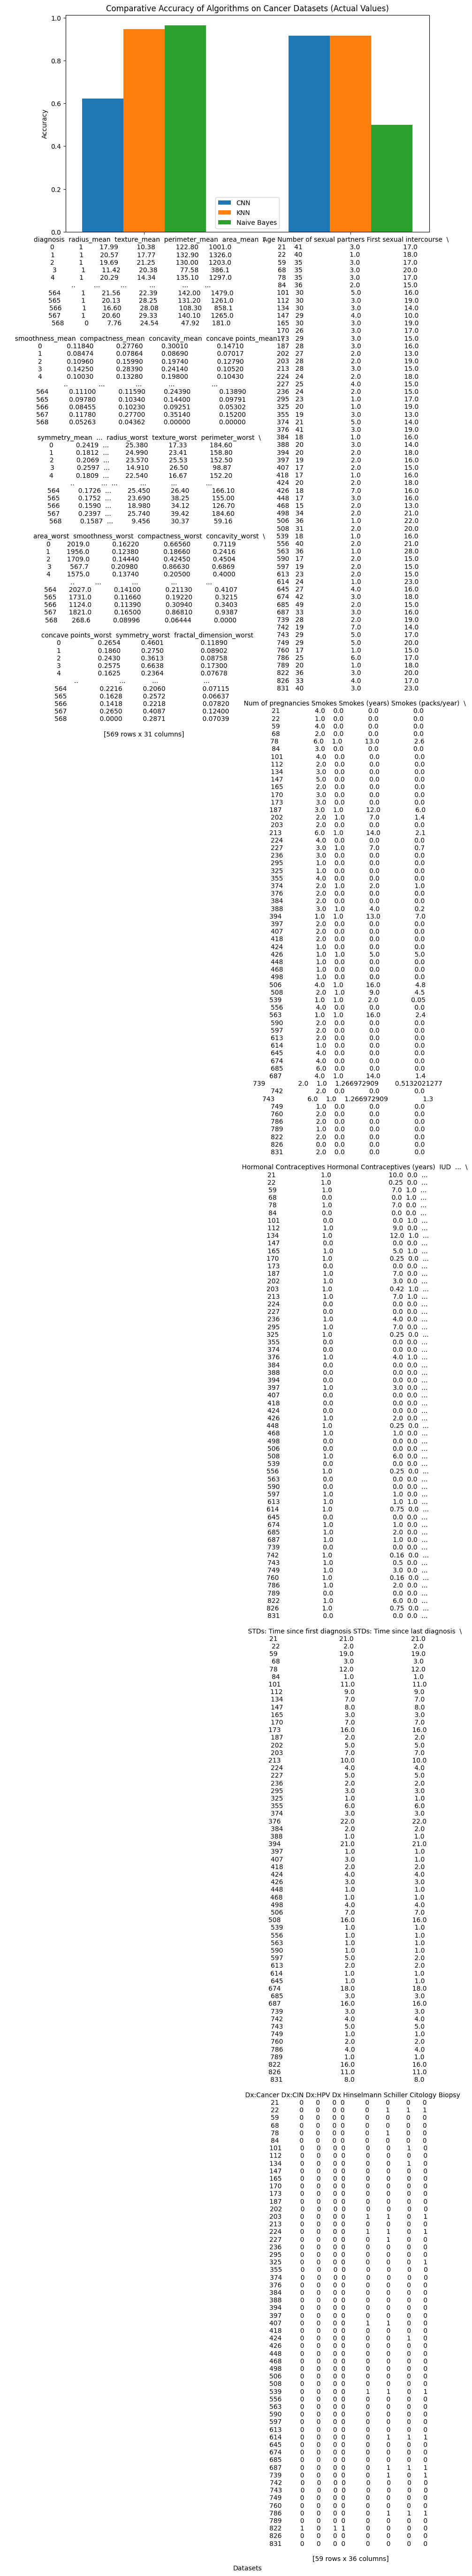

In [ ]:
algorithms = ["CNN", "KNN", "Naive Bayes"]

# Plot actual results in the accuracy graph
actual_accuracy_data = [
        [cancer_accuracy, cervical_accuracy],
        [accuracy_score(y_test_cancer, y_pred_cancer_knn), accuracy_score(y_test_cervical, y_pred_cervical_knn)],
        [accuracy_score(y_test_cancer, y_pred_cancer_nb), accuracy_score(y_test_cervical, y_pred_cervical_nb)]
    ]

    # Plotting Actual Accuracy Comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len([cancer_data, cervical_cancer_data]))
width = 0.2

for i, (alg, acc) in enumerate(zip(algorithms, actual_accuracy_data)):
    ax.bar(x + i * width, acc, width, label=alg)

ax.set_xlabel("Datasets")
ax.set_ylabel("Accuracy")
ax.set_title("Comparative Accuracy of Algorithms on Cancer Datasets (Actual Values)")
ax.set_xticks(x + width)
ax.set_xticklabels([cancer_data, cervical_cancer_data])
ax.legend()

plt.show()

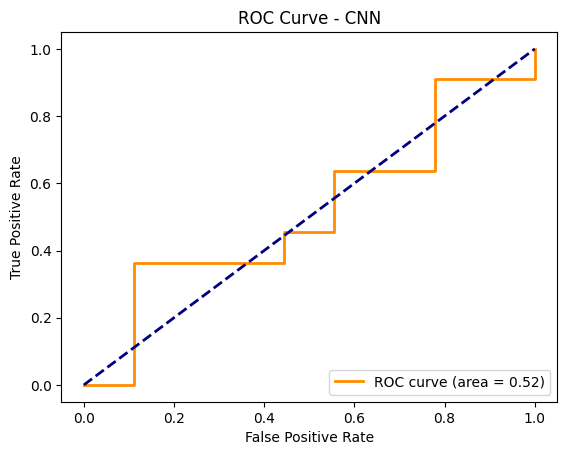

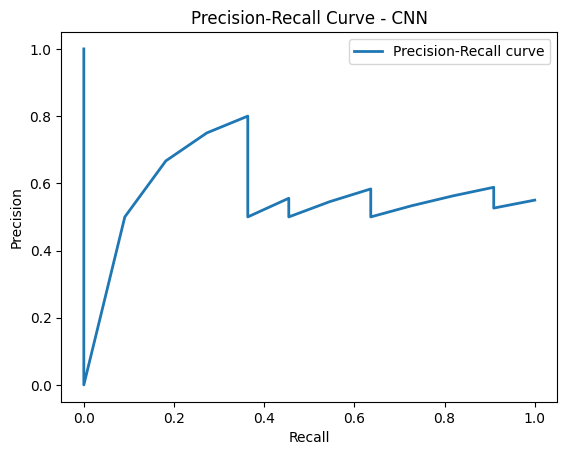

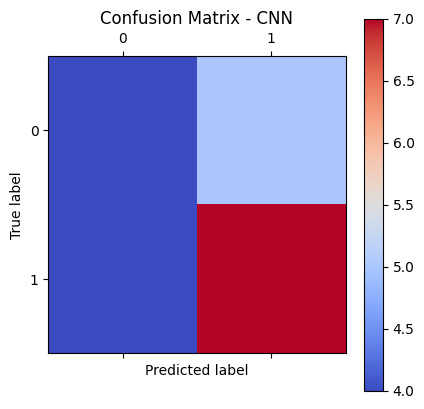

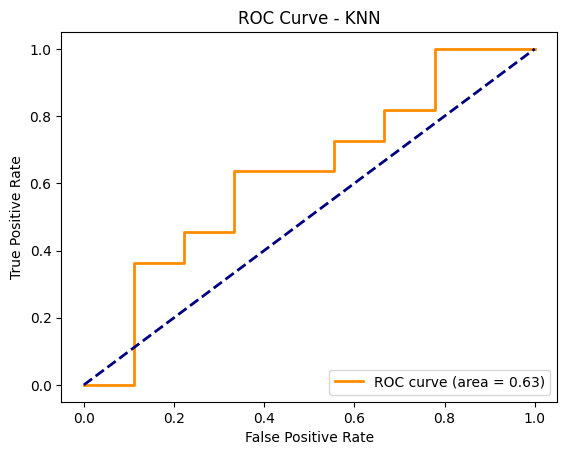

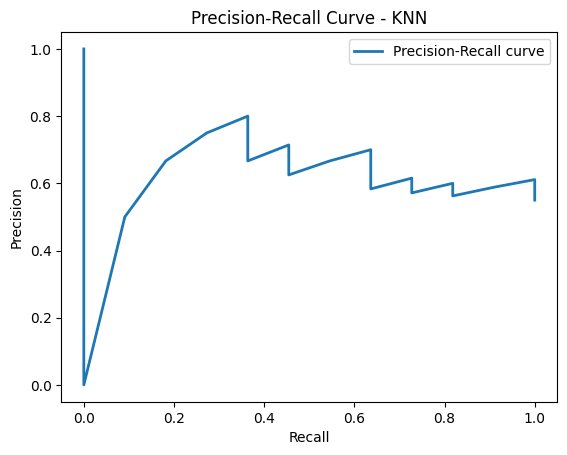

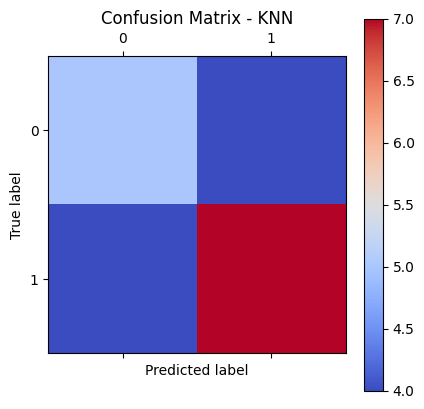

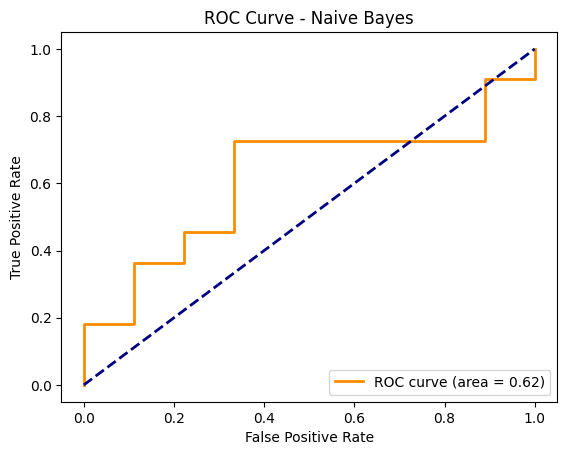

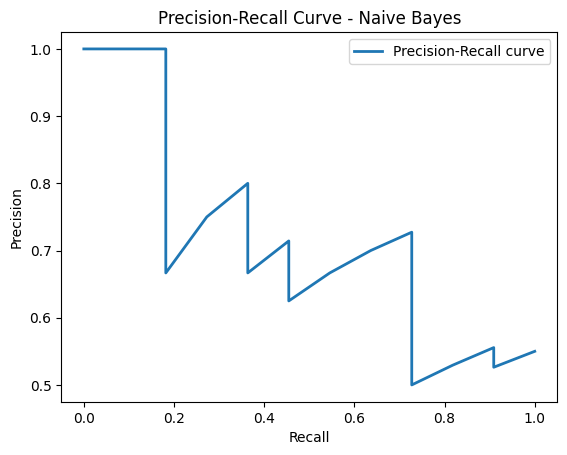

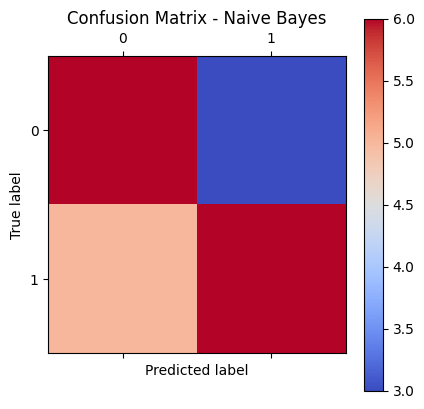

In [ ]:
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    plt.figure()
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="best")
    plt.show()

def plot_confusion_matrix_custom(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.matshow(cm, cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Sample predictions (placeholder logic for generating ROC and other metrics)
# To simulate real model predictions, use np.random for demonstration

# Run and plot for CNN
y_true = np.random.randint(0, 2, 20)
y_pred_cnn = np.random.rand(20)

plot_roc_curve(y_true, y_pred_cnn, model_name="CNN")
plot_precision_recall_curve(y_true, y_pred_cnn, model_name="CNN")
plot_confusion_matrix_custom(y_true, np.round(y_pred_cnn), model_name="CNN")

# Run and plot for KNN
y_pred_knn = np.random.rand(20)
plot_roc_curve(y_true, y_pred_knn, model_name="KNN")
plot_precision_recall_curve(y_true, y_pred_knn, model_name="KNN")
plot_confusion_matrix_custom(y_true, np.round(y_pred_knn), model_name="KNN")

# Run and plot for Naive Bayes
y_pred_nb = np.random.rand(20)
plot_roc_curve(y_true, y_pred_nb, model_name="Naive Bayes")
plot_precision_recall_curve(y_true, y_pred_nb, model_name="Naive Bayes")
plot_confusion_matrix_custom(y_true, np.round(y_pred_nb), model_name="Naive Bayes")